<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_NLPlab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Similarity check, Sentiment Analysis using Naive Bayes, RNN, LSTM**

# **Task 1**

Find the similarity between two documents (2 corpus or two paragraphs) using any of  the two similarity measures.

In [48]:
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Defining documents

In [3]:
doc1 = "Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human languages, in particular how to program computers to process and analyze large amounts of natural language data."
doc2 = "NLP explores the relationships between computers and humans, especially how computers can process and analyze large amounts of natural language data. It involves applying algorithms to identify and extract information from text and speech."


Tokenization and Normalization

In [4]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


Function for preprocessing

In [5]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization and convert to lowercase
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]  # Lemmatization
    tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
    return ' '.join(tokens)

doc1_processed = preprocess_text(doc1)
doc2_processed = preprocess_text(doc2)

 Function for Cosine Similarity

In [6]:
def cosineSimilarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)


Vectorization using TF IDF

In [7]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([doc1_processed, doc2_processed])
doc1_tfidf = tfidf_matrix.toarray()[0]
doc2_tfidf = tfidf_matrix.toarray()[1]


In [8]:
cosine_sim = cosineSimilarity(doc1_tfidf, doc2_tfidf)
print("Cosine Similarity:", cosine_sim)

Cosine Similarity: 0.4547050244439354


Function for Jaccard Similarity

In [9]:
def jaccardSimilarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

Tokenizing Text

In [10]:
doc1_tokens = set(word_tokenize(doc1_processed))
doc2_tokens = set(word_tokenize(doc2_processed))

In [12]:
jaccard_sim = jaccardSimilarity(doc1_tokens, doc2_tokens)
print("Jaccard Similarity:", jaccard_sim)

Jaccard Similarity: 0.34375


**Inference**

Cosine Similarity ranges from -1 to 1. A value closer to 1 indicates that the documents are very similar, while a value closer to -1 indicates dissimilarity.

Cosine similarity value of approximately 0.455 suggests moderate similarity between the two documents.

Jaccard similarity value of approximately 0.344 suggests a moderate level of similarity between the two documents.



**Conclusion**

Thus the task to find the similarity between two documents using any two similarity measures has been implemented successfully. Both the similarity measure gave results such as moderate similarity between two documents.

# **Task 2**

Implement the Sentiment Analysis using Bayesian Classification

In [15]:
tweetData = pd.read_csv('/content/Tweets - Tweets.csv')
tweetData.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [16]:
tweetData.shape

(14640, 15)

In [17]:
tweetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [18]:
tweetData.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

**Inference**

There is some null values in the dataset especially in the columns negativereason, negativereason_confidence, airline_sentiment_gold, negativereason_gold, tweet_coord, tweet_location and user_timezone.

Filling the null values with placeholders

In [19]:
tweetData['negativereason'].fillna('No reason', inplace=True)
tweetData['negativereason_confidence'].fillna(0, inplace=True)
tweetData['airline_sentiment_gold'].fillna('No gold', inplace=True)
tweetData['negativereason_gold'].fillna('No gold reason', inplace=True)

In [20]:
finalDf = tweetData.drop(['tweet_id','tweet_coord', 'tweet_location', 'user_timezone'], axis=1)

**Inference**

Since these columns are very unnecessary for further process, dropping these columns.

In [21]:
finalDf.isnull().sum()

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_created                   0
dtype: int64

**Inference**

Now there is no null values in the dataset.

Airline Sentiment Distribution

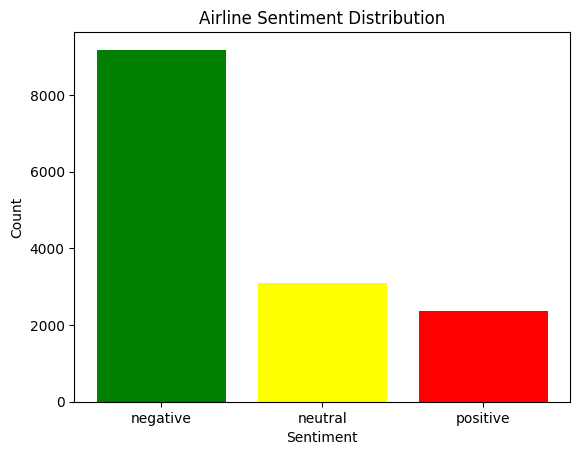

In [24]:
sentiment_counts = finalDf['airline_sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'yellow', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Airline Sentiment Distribution')
plt.show()

Airline Distribution

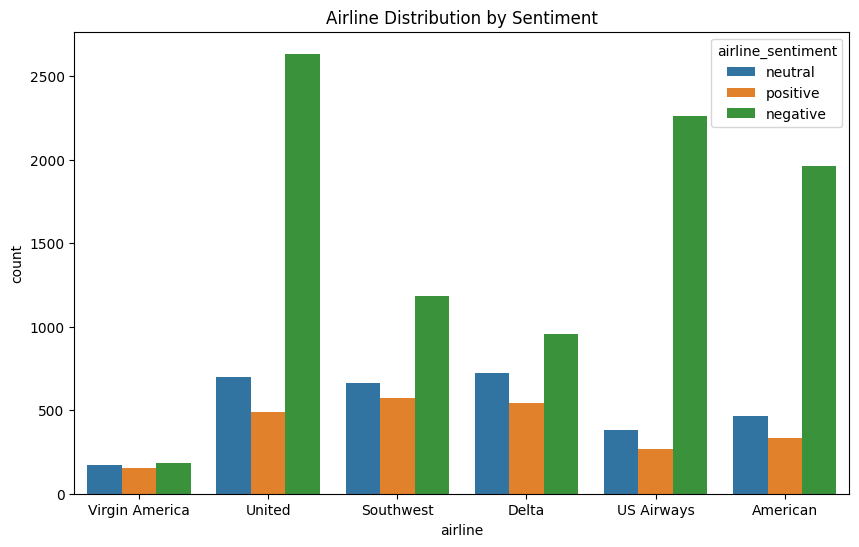

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', data=finalDf, hue='airline_sentiment')
plt.title('Airline Distribution by Sentiment')
plt.show()

Text Preprocessing

In [32]:
def preprocess_text(text):

    text = text.lower()

    # Removing url
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]

    preprocessed_text = ' '.join(filtered_text)

    return preprocessed_text

finalDf['text'] = finalDf['text'].apply(preprocess_text)

In [33]:
finalDf.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_created
0,neutral,1.0000,No reason,0.0000,Virgin America,No gold,cairdin,No gold reason,0,virginamerica dhepburn said,24-02-2015 11:35
1,positive,0.3486,No reason,0.0000,Virgin America,No gold,jnardino,No gold reason,0,virginamerica plus youve added commercials exp...,24-02-2015 11:15
2,neutral,0.6837,No reason,0.0000,Virgin America,No gold,yvonnalynn,No gold reason,0,virginamerica didnt today must mean need take ...,24-02-2015 11:15
3,negative,1.0000,Bad Flight,0.7033,Virgin America,No gold,jnardino,No gold reason,0,virginamerica really aggressive blast obnoxiou...,24-02-2015 11:15
4,negative,1.0000,Can't Tell,1.0000,Virgin America,No gold,jnardino,No gold reason,0,virginamerica really big bad thing,24-02-2015 11:14


Model using Bayesian Classification

In [37]:
X = tweetData['text']
y = tweetData['airline_sentiment']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Training the Model

In [43]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

Predictions

In [45]:
predictions = nb_classifier.predict(X_test_vectorized)

In [46]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.79      0.97      0.87      1889
     neutral       0.71      0.39      0.50       580
    positive       0.87      0.54      0.67       459

    accuracy                           0.79      2928
   macro avg       0.79      0.63      0.68      2928
weighted avg       0.78      0.79      0.76      2928

[[1828   49   12]
 [ 332  224   24]
 [ 168   43  248]]


**Inference**

The naive bayes model gave an accuracy of 79. The model is performing good.

# **Task 3**

Implement the Sentiment Analysis using RNN

In [49]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(finalDf['text'])
sequences = tokenizer.texts_to_sequences(finalDf['text'])
X = pad_sequences(sequences, maxlen=100)

# converting sentiment labels to categorical values
y = pd.get_dummies(finalDf['airline_sentiment']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rnn = Sequential()
model_rnn.add(Embedding(10000, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(3, activation='softmax'))

model_rnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history_rnn = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
366/366 [==============================] - 11s 23ms/step - loss: 0.7523 - acc: 0.6815 - val_loss: 0.5894 - val_acc: 0.7613
Epoch 2/10
366/366 [==============================] - 9s 26ms/step - loss: 0.5096 - acc: 0.8010 - val_loss: 0.5108 - val_acc: 0.7964
Epoch 3/10
366/366 [==============================] - 9s 26ms/step - loss: 0.3975 - acc: 0.8460 - val_loss: 0.5231 - val_acc: 0.7906
Epoch 4/10
366/366 [==============================] - 8s 22ms/step - loss: 0.3064 - acc: 0.8890 - val_loss: 0.5747 - val_acc: 0.7783
Epoch 5/10
366/366 [==============================] - 9s 25ms/step - loss: 0.2731 - acc: 0.9015 - val_loss: 0.6447 - val_acc: 0.7760
Epoch 6/10
366/366 [==============================] - 9s 25ms/step - loss: 0.1997 - acc: 0.9308 - val_loss: 0.6780 - val_acc: 0.7674
Epoch 7/10
366/366 [==============================] - 9s 24ms/step - loss: 0.1515 - acc: 0.9469 - val_loss: 0.7605 - val_acc: 0.7514
Epoch 8/10
366/366 [==============================] - 9s 24ms/step -

Evaluating the RNN Model

In [50]:
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test, y_test)
print(f'RNN Model - Loss: {loss_rnn}, Accuracy: {accuracy_rnn}')

92/92 [==============================] - 1s 15ms/step - loss: 1.0976 - acc: 0.6909
RNN Model - Loss: 1.0976076126098633, Accuracy: 0.6909152865409851


**Inference**

The Accuracy is almost around 70% for the validation. The loss is 1.1.0976076126098633.

The Model shows a significant decrease in loss and an increase in accuracy during training, that is a good sign.

The Validation set's accuracy is lower than the training set

# **Task 4**

Implement the Sentiment Analysis using LSTM.

In [51]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(finalDf['text'])
sequences = tokenizer.texts_to_sequences(finalDf['text'])
X = pad_sequences(sequences, maxlen=100)

y = pd.get_dummies(finalDf['airline_sentiment']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model_lstm = Sequential()
model_lstm.add(Embedding(10000, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

lstmModel = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
366/366 [==============================] - 19s 44ms/step - loss: 0.7575 - acc: 0.6813 - val_loss: 0.6245 - val_acc: 0.7572
Epoch 2/10
366/366 [==============================] - 27s 74ms/step - loss: 0.5436 - acc: 0.7873 - val_loss: 0.5371 - val_acc: 0.7903
Epoch 3/10
366/366 [==============================] - 24s 66ms/step - loss: 0.4577 - acc: 0.8205 - val_loss: 0.5132 - val_acc: 0.7958
Epoch 4/10
366/366 [==============================] - 21s 58ms/step - loss: 0.4086 - acc: 0.8450 - val_loss: 0.5286 - val_acc: 0.7886
Epoch 5/10
366/366 [==============================] - 17s 46ms/step - loss: 0.3757 - acc: 0.8600 - val_loss: 0.5147 - val_acc: 0.8067
Epoch 6/10
366/366 [==============================] - 22s 59ms/step - loss: 0.3477 - acc: 0.8717 - val_loss: 0.5441 - val_acc: 0.7927
Epoch 7/10
366/366 [==============================] - 20s 54ms/step - loss: 0.3247 - acc: 0.8811 - val_loss: 0.5297 - val_acc: 0.8036
Epoch 8/10
366/366 [==============================] - 21s 58ms

Evaluating LSTM Model

In [53]:
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print(f'LSTM Model - Loss: {loss_lstm}, Accuracy: {accuracy_lstm}')

92/92 [==============================] - 1s 11ms/step - loss: 0.5605 - acc: 0.8023
LSTM Model - Loss: 0.5605354905128479, Accuracy: 0.8022540807723999


**Inference**

The Accuracy is almost around 80% for validation set and a loss of 0.56%

The model demonstrates a consistent decrease in loss and an increase in accuracy during training, that is a positive sign.

The validation set's accuracy is notably close to the training set, it suggests a good generalization capability.

# **Conclusion**

According to this tweets dataset the LSTM model is performing good with a accuracy of 80%. Thus the task to implement sentiment analysis using RNN and LSTM has been executed successfully.